## BREAST CANCER WISCOIN (DIAGNOSIS) DATASET CLASSIFICATION ##

In this assignment, we are going to use multiple classification techniques we've learned to classify breast cancer diagnosis results and understand that which classification technique is giving us the more accurate result than others

Firstly we'll start off with importing all useful libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np # For Linear Algebra functions
import pandas as pd # For data processing
# import sns
from sklearn.preprocessing import StandardScaler # For scaling features
from sklearn.model_selection import train_test_split # For splitting dataset into training and testing dataset
from sklearn import svm # For examining SVM technique
from sklearn.linear_model import LogisticRegression # For examining Logistic Regression Classification Technique
from sklearn.neighbors import KNeighborsClassifier # For examining KNeighbour Classification Technique
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
dataset.shape

(569, 33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
dataset.drop(columns=['Unnamed: 32'], axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
dataset.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

/var/folders/z8/d8n87xks20g7k6qydrl_sqy40000gn/T/ipykernel_9394/1697684984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
/var/folders/z8/d8n87xks20g7k6qydrl_sqy40000gn/T/ipykernel_9394/1697684984.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [9]:
X = dataset.drop(columns=['diagnosis','Unnamed: 32'], axis=1)
Y = dataset['diagnosis']

In [10]:
X.shape

(569, 31)

In [11]:
Y.shape

(569,)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Fit data into Knn Classifier

In [14]:
kNN_Model = KNeighborsClassifier(n_neighbors=10)
kNN_Model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=10)

Fit Data into Logistic Regression Model

In [15]:
logistic_model = LogisticRegression()

In [16]:
logistic_model.fit(X_train,Y_train)

LogisticRegression()

Fit Data into SVM Classifier

In [17]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [18]:
from sklearn.naive_bayes import GaussianNB
gm_model = GaussianNB()
gm_model.fit(X_train,Y_train)

GaussianNB()

Predicting Logistic Regression, SVM and kNeighbor Classifier Models

In [19]:
#Logistic Regression Prediction
logistic_train_pred = logistic_model.predict(X_train)
logistic_train_accuracy = accuracy_score(Y_train,logistic_train_pred)
logistic_train_precision = precision_score(Y_train, logistic_train_pred)
logistic_train_recall = recall_score(Y_train, logistic_train_pred)
logistic_train_f1_score = f1_score(Y_train, logistic_train_pred)

logistic_test_pred = logistic_model.predict(X_test)
logistic_test_accuracy = accuracy_score(Y_test,logistic_test_pred)
logistic_test_precision = precision_score(Y_test, logistic_test_pred)
logistic_test_recall = recall_score(Y_test, logistic_test_pred)
logistic_test_f1_score = f1_score(Y_test, logistic_test_pred)

#kNN Classifier Prediction
knn_train_pred = kNN_Model.predict(X_train)
knn_accuracy = accuracy_score(Y_train,knn_train_pred)
knn_precision = precision_score(Y_train,knn_train_pred)
knn_recall = recall_score(Y_train,knn_train_pred)
knn_fi_score = f1_score(Y_train,knn_train_pred)

knn_test_pred = kNN_Model.predict(X_test)
knn_test_accuracy = accuracy_score(Y_test,knn_test_pred)
knn_test_precision = precision_score(Y_test,knn_test_pred)
knn_test_recall = recall_score(Y_test,knn_test_pred)
knn_test_f1_score = f1_score(Y_test,knn_test_pred)

#SVM Classifier Prediction
svm_train_pred = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(Y_train,svm_train_pred)
svm_train_precision = precision_score(Y_train,svm_train_pred)
svm_train_recall = recall_score(Y_train,svm_train_pred)
svm_train_f1_score = f1_score(Y_train,svm_train_pred)

svm_test_pred = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(Y_test,svm_test_pred)
svm_test_precision = precision_score(Y_test,svm_test_pred)
svm_test_recall = recall_score(Y_test,svm_test_pred)
svm_test_f1_score = f1_score(Y_test,svm_test_pred)

#Gaussian Model Classifier Prediction
gm_train_pred = gm_model.predict(X_train)
gm_train_accuracy = accuracy_score(Y_train,gm_train_pred)
gm_train_precision = precision_score(Y_train,gm_train_pred)
gm_train_recall = recall_score(Y_train,gm_train_pred)
gm_train_f1_score = f1_score(Y_train,gm_train_pred)

gm_test_pred = gm_model.predict(X_test)
gm_test_accuracy = accuracy_score(Y_test,gm_test_pred)
gm_test_precision = precision_score(Y_test,gm_test_pred)
gm_test_recall = recall_score(Y_test,gm_test_pred)
gm_test_f1_score = f1_score(Y_test,gm_test_pred)

Plotting metrices of all the ML Models 

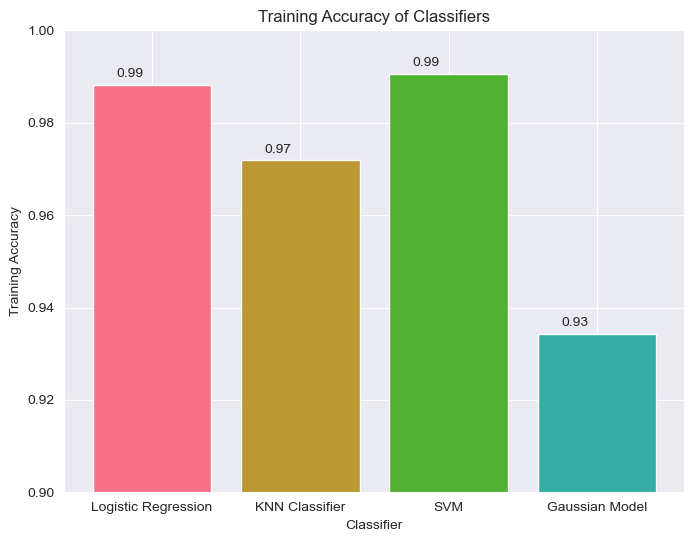

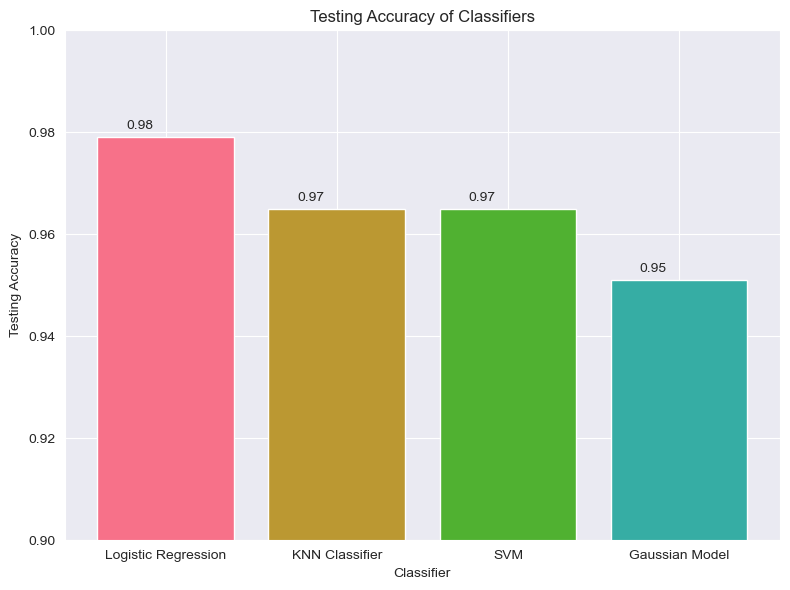

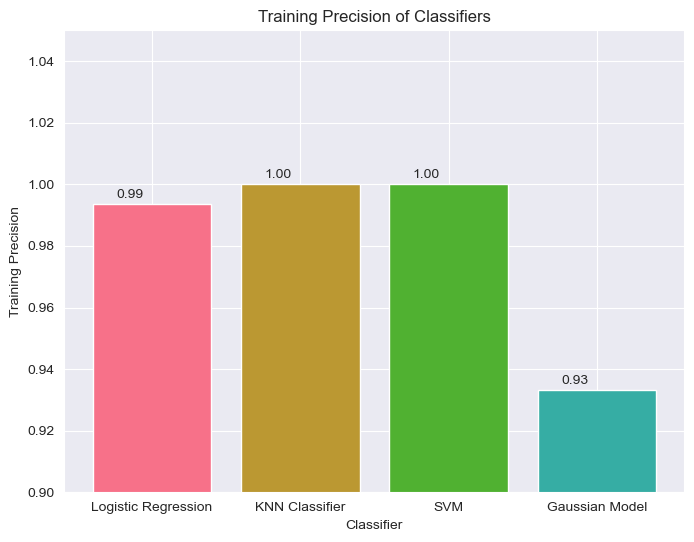

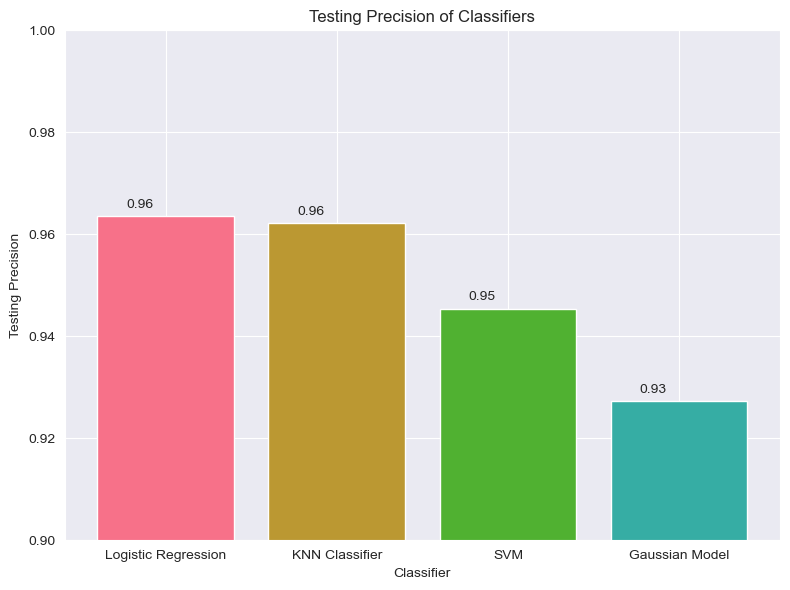

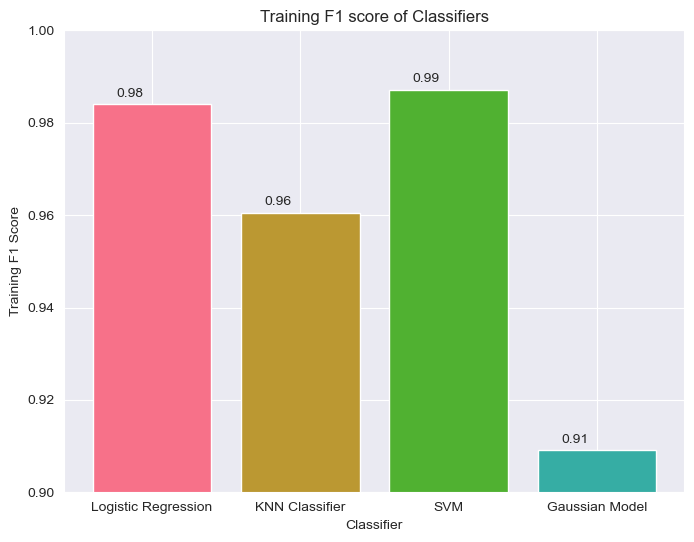

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

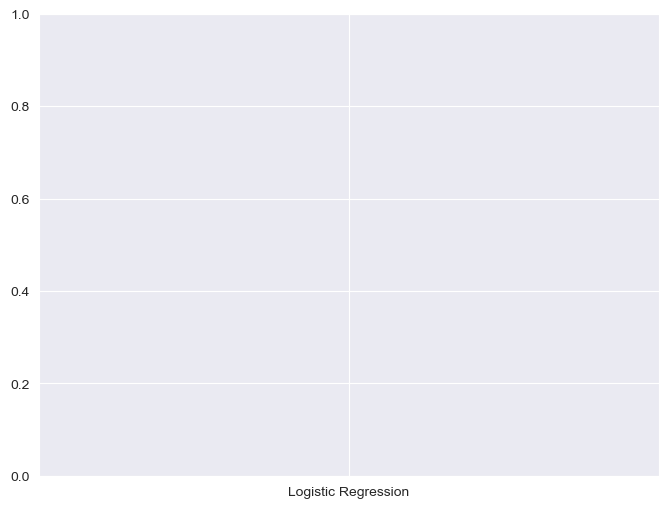

In [20]:
# Bar plot for all model confusion matrix parameters 
random_colors = sns.color_palette('husl')
classifiers =['Logistic Regression', 'KNN Classifier', 'SVM', 'Gaussian Model']
#Plotting train accuracy for all ML Models

training_accuracies = [logistic_train_accuracy, knn_accuracy, svm_train_accuracy, gm_train_accuracy]

# Plotting the bar plot
plt.figure(figsize=(8,6))
# plt.subplot(1,1,1)
bars = plt.bar(classifiers, training_accuracies, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy of Classifiers')

for bar, accuracy in zip(bars, training_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

# plt.tight_layout()
plt.show()

#Plotting test accuracy for all ML Models

testing_accuracies = [logistic_test_accuracy, knn_test_accuracy, svm_test_accuracy, gm_test_accuracy]

# Plotting the bar plot
plt.figure(figsize=(8,6))
# plt.subplot(1,2,1)
bars = plt.bar(classifiers, testing_accuracies, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy of Classifiers')

for bar, accuracy in zip(bars, testing_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Plotting train precision for all ML Models

training_precisions = [logistic_train_precision, knn_precision, svm_train_precision, gm_train_precision]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, training_precisions, color=random_colors)
plt.ylim(0.9, 1.05)  
plt.xlabel('Classifier')
plt.ylabel('Training Precision')
plt.title('Training Precision of Classifiers')

for bar, accuracy in zip(bars, training_precisions):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

#Plotting test precision for all ML Models
testing_precisions = [logistic_test_precision, knn_test_precision, svm_test_precision, gm_test_precision]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, testing_precisions, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Testing Precision')
plt.title('Testing Precision of Classifiers')

for bar, accuracy in zip(bars, testing_precisions):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Plotting train f1-score for all ML Models
training_f1_score = [logistic_train_f1_score, knn_fi_score, svm_train_f1_score, gm_train_f1_score]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, training_f1_score, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Training F1 Score')
plt.title('Training F1 score of Classifiers')

for bar, accuracy in zip(bars, training_f1_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

#Plotting testing f1-score for all ML Models
testing_f1_score = [logistic_test_f1_score, knn_test_f1_score, svm_test_f1_score]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, testing_f1_score, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Testing F1 Score')
plt.title('Testing F1 score of Classifiers')

for bar, accuracy in zip(bars, testing_f1_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Plotting train recall for all ML Models
training_recall = [logistic_train_recall, knn_recall, svm_train_recall]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, training_recall, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Training Recall')
plt.title('Training Recall of Classifiers')

for bar, accuracy in zip(bars, training_recall):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

#Plotting testing f1-score for all ML Models
testing_recall = [logistic_test_recall, knn_test_recall, svm_test_recall, gm_test_recall]

# Plotting the bar plot
plt.figure(figsize=(8,6))
bars = plt.bar(classifiers, testing_recall, color=random_colors)
plt.ylim(0.9, 1.0)  
plt.xlabel('Classifier')
plt.ylabel('Testing Recall')
plt.title('Testing Recall of Classifiers')

for bar, accuracy in zip(bars, testing_recall):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Confusion Matrix for Logistic Regression Model

In [ ]:
cm = confusion_matrix(Y_test,logistic_test_pred)
print(cm)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,logistic_test_pred), annot=True, cmap= 'BuPu')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
plt.savefig('Confusion_Matrix_Logistic_Regression.png', dpi = 300)

Confusion Matrix for kNN Classification Model

In [21]:
print(confusion_matrix(Y_test,knn_test_pred))

[[87  2]
 [ 3 51]]


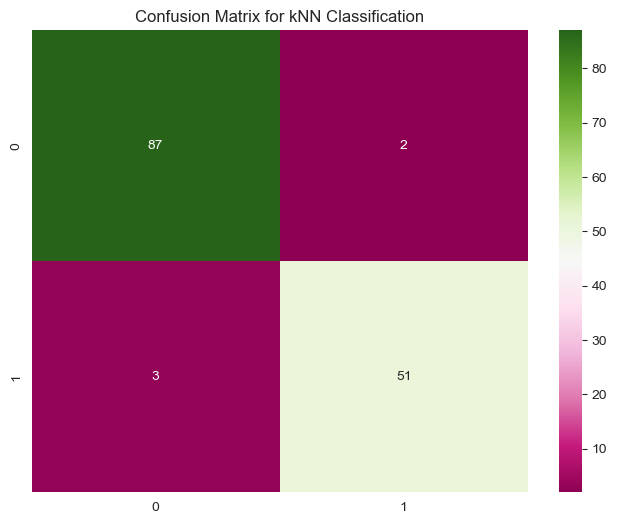

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,knn_test_pred), annot=True, cmap= 'PiYG')
plt.title('Confusion Matrix for kNN Classification')
plt.show()

Confusion Matrix for SVM Classifier Model

In [23]:
print(confusion_matrix(Y_test,svm_test_pred))

[[86  3]
 [ 2 52]]


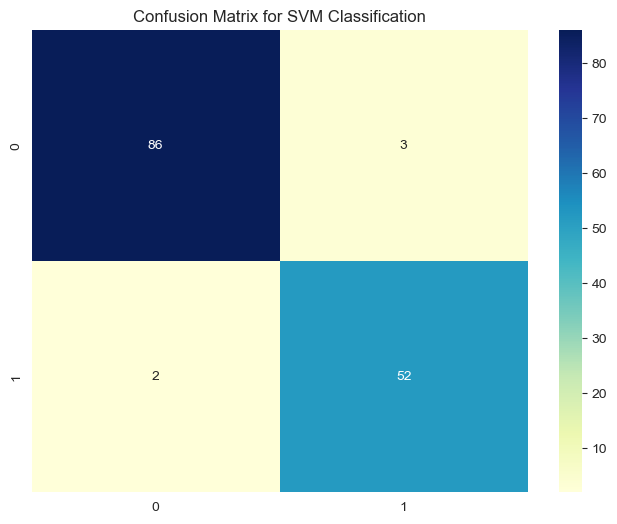

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,svm_test_pred), annot=True, cmap= 'YlGnBu')
plt.title('Confusion Matrix for SVM Classification')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


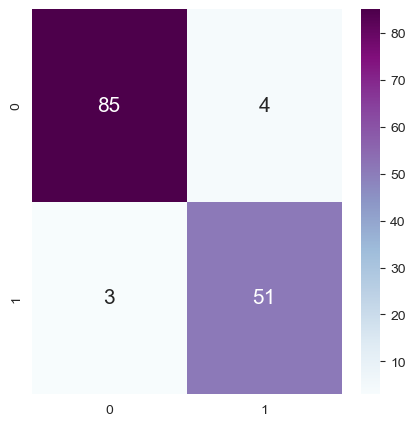

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
Y_pred = gm_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap= 'BuPu')

# classification report
cr = classification_report(Y_test, Y_pred)
print(cr)